# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Arifsan Pinim
- **Email:** binomoku02@gmail.com
- **ID Dicoding:** MC484D5Y2080

## Menentukan Pertanyaan Bisnis

- Bagaimana pola penggunaan sepeda berdasarkan musim dan cuaca?
- Apakah hari kerja dan hari libur memengaruhi jumlah penyewaan sepeda?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

## Data Wrangling

### Gathering Data

In [2]:
day_df = pd.read_csv('data/day.csv')
hour_df = pd.read_csv('data/hour.csv')

**Insight:**
- Dataset day.csv berisi data penyewaan sepeda harian.
- Dataset hour.csv berisi data penyewaan sepeda per jam.
- Data mencakup periode 2011 hingga 2012 dari sistem Capital Bikeshare, Washington D.C.. 

### Assessing Data

In [3]:
print(day_df.info())
print(hour_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns

**Insight:**
- Data tidak memiliki missing values
- Perlu melakukan konversi kategori numerik ke label yang lebih jelas

### Cleaning Data

In [4]:
os.makedirs("data", exist_ok=True)
os.makedirs("dashboard", exist_ok=True)

day_df.to_csv("dashboard/main_data.csv", index=False)

**Insight:**
- Dataset telah disimpan ke dalam folder data/ dan dashboard/


## Exploratory Data Analysis (EDA)

### Explore ...

In [5]:
display(day_df.describe())
display(hour_df.describe())

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- Jumlah penyewaan sepeda memiliki variasi yang tinggi


## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana pola penggunaan sepeda berdasarkan musim dan cuaca?

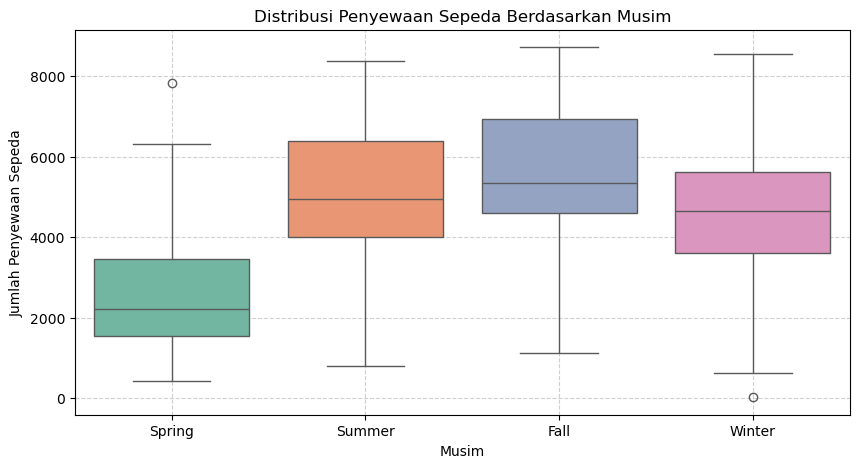

In [6]:
plt.figure(figsize=(10,5))
sns.boxplot(x='season', y='cnt', hue='season', data=day_df, palette='Set2')
plt.xticks([0,1,2,3], ['Spring', 'Summer', 'Fall', 'Winter'])
plt.xlabel("Musim")
plt.ylabel("Jumlah Penyewaan Sepeda")
plt.title("Distribusi Penyewaan Sepeda Berdasarkan Musim")
plt.grid(True, linestyle="--", alpha=0.6)
plt.legend([],[], frameon=False)  # Menghilangkan legenda tambahan
plt.show()

### Pertanyaan 2:

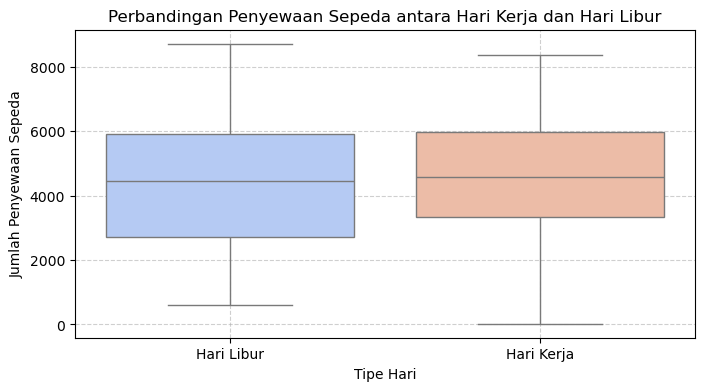

In [7]:
plt.figure(figsize=(8,4))
sns.boxplot(x='workingday', y='cnt', hue='workingday', data=day_df, palette='coolwarm')
plt.xticks([0,1], ['Hari Libur', 'Hari Kerja'])
plt.xlabel("Tipe Hari")
plt.ylabel("Jumlah Penyewaan Sepeda")
plt.title("Perbandingan Penyewaan Sepeda antara Hari Kerja dan Hari Libur")
plt.grid(True, linestyle="--", alpha=0.6)
plt.legend([],[], frameon=False)
plt.show()

**Insight:**
- Musim panas dan musim gugur memiliki tingkat penyewaan tertinggi
- Hari kerja memiliki lebih banyak penyewaan dibanding hari libur

## Conclusion

- Pola penggunaan sepeda dipengaruhi oleh musim, dengan penyewaan tertinggi di musim panas dan gugur.
- Hari kerja memiliki lebih banyak penyewaan dibandingkan hari libur, menunjukkan bahwa sepeda sering digunakan untuk   
  aktivitas sehari-hari seperti bekerja atau sekolah.